## Select one road


In [22]:
%load_ext autoreload
%autoreload 2

import file_handler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper
import re


In [2]:

def getRoadChart(road):
    city = 'تهران'

    roads = []

    for year in range(1395, 1403):
        for month in range(1, 13):
            item = ''
            try:
                item = file_handler.getRoadAddress(
                    str(year), str(month), city, road)
                if item != None:
                    roads.append(item)
            except:
                break

    df = file_handler.load_csv_file(roads[0])
    for i in range(len(roads)):
        df = df._append(file_handler.load_csv_file(roads[i]))
    df = df.reset_index()
    
    return df


In [3]:

# df2 = getRoadChart('113201')

# plt.figure()  # Create a new figure for each plot
# plt.plot(df2['زمان شروع'], df2['تعداد کل وسیله نقلیه'])

# # Customize x-axis ticks and labels
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# # Add more customization as needed

# # Add title, labels, legend, etc.
# plt.title(file_handler.persin_fix('title'))
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.legend(['Legend'])


In [4]:
# get all codes for tehran
codes = list(map ( lambda x: re.search('([0-9]{6,6})', x).group(),file_handler.get_dayly_data_path_with_year_month_city('1395','2','تهران')))


In [5]:
t = file_handler.get_dayly_data_path_with_year_month_city('1395','2','تهران')
names = {}
for i in range(len(t)):
    names[codes[i]] = ' '.join(t[i].split('/')[-1].split(' ')[2:-1])


In [6]:
roads = dict()
for code in codes:
    roads[code] = getRoadChart(str(code))

/tmp/ipykernel_111563/1319043241.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(file_handler.load_csv_file(roads[i]))


In [7]:
# Working with an example df
df = roads['113201']
type(df)


# TODO smooth worked time


# df.loc[df['مدت زمان کارکرد(دقیقه)'] < 1440]
df.drop(columns='index', inplace=True)



In [8]:
from sklearn.linear_model import LinearRegression
regression = dict()

for i in  range(len(codes)):
    model = LinearRegression()
    df = getRoadChart(codes[i])

    y = df['تعداد کل وسیله نقلیه']
    x = np.reshape(df.index, (-1,1))
    model.fit(x, y)
    regression[codes[i]] = model



/tmp/ipykernel_111563/1319043241.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(file_handler.load_csv_file(roads[i]))


In [9]:
for (code,name ) in enumerate(names):
    print(names[name] + " : " + str(regression[name].coef_))


‫آزادراه قم - گرمسار‬ : [0.71145024]
‫تهران - قم (آزادراه)‬ : [-3.45287074]
‫تهران - ساوه (ابتداي آزادراه)‬ : [-3.63527606]
‫تهران - جاجرود‬ : [0.2037514]
‫تهران - پرديس (ابتداي آزادراه)‬ : [2.43813245]
‫تهران - ‍پرديس (انتهاي آزادراه)‬ : [4.17938032]
‫تهران - پاکدشت‬ : [-5.62668682]
‫عوارضي تهران - قم‬ : [-3.99508953]
‫چرمشهر - حسن‌آباد ‬ : [0.8491198]
‫امام زاده داوود - تهران‬ : [-0.07217046]
‫تهران - لواسان (طلاييه)‬ : [-1.25936475]
‫تهران - لواسان (سوهانک)‬ : [0.15163055]
‫آزادراه تهران - ساوه(پرند)‬ : [4.94595403]
‫آزادراه گرمسار - قم‬ : [0.56684358]
‫قم - تهران (آزادراه)‬ : [-4.05427864]
‫ساوه - تهران (ابتداي آزادراه)‬ : [0.70824497]
‫جاجرود - تهران‬ : [1.33224067]
‫پرديس - تهران (ابتداي آزادراه)‬ : [3.37700578]
‫پرديس - تهران (انتهاي آزادراه)‬ : [8.91990877]
‫پاکدشت - تهران‬ : [-1.56803076]
‫قم - تهران عوارضي‬ : [0.40086028]
‫حسن آباد - چرمشهر‬ : [0.41707046]
‫تهران - امام زاده داوود‬ : [-0.09764096]
‫لواسان - تهران (طلاييه)‬ : [-3.73722788]
‫لواسان - تهران (سوهانک)‬ : [0.079489

In [10]:

regression = {k: v for k, v in regression.items() if v != {}}

sorted_models = sorted(regression.items(), key=lambda x: x[1].coef_[0])

for (name, coef) in sorted_models:
    print(names[name], regression[name].coef_)

‫همت - وردآورد‬ [-14.14302403]
‫آزادراه کرج - تهران (عوارضي قديم)‬ [-11.49917608]
‫تهران - پاکدشت‬ [-5.62668682]
‫قم - تهران (آزادراه)‬ [-4.05427864]
‫عوارضي تهران - قم‬ [-3.99508953]
‫لواسان - تهران (طلاييه)‬ [-3.73722788]
‫تهران - ساوه (ابتداي آزادراه)‬ [-3.63527606]
‫تهران - قم (آزادراه)‬ [-3.45287074]
‫شهريار - تهران (چيتگر - باغستان)‬ [-2.93530699]
‫ري - قرچک ‬ [-2.43670848]
‫وردآورد - همت‬ [-1.97549841]
‫پاکدشت - تهران‬ [-1.56803076]
‫آزادراه تهران - کرج (عوارضي قديم)‬ [-1.40120143]
‫اسلامشهر - واوان‬ [-1.31435299]
‫امامزاده هاشم - سه راهي مشاء‬ [-1.27375213]
‫ديزين - شمشک‬ [-1.26354478]
‫تهران - لواسان (طلاييه)‬ [-1.25936475]
‫واوان - اسلامشهر‬ [-1.24703248]
‫شمشک - ديزين‬ [-1.1908655]
‫حسن آباد - تهران (جاده قديم قم)‬ [-0.92333275]
‫ميگون - شمشک‬ [-0.67955198]
‫سربندان - امين آباد ‬ [-0.54861659]
‫سه راهي مشاء - امامزاده هاشم‬ [-0.51239174]
‫سه راهي ارجمند - فيروزکوه‬ [-0.2982392]
‫ميگون - فشم‬ [-0.27698221]
‫تهران - شهريار (دپو)‬ [-0.14941899]
‫فشم - ميگون‬ [-0.09894417]
‫تهرا

<Axes: title={'center': '(ﻩﺍﺭﺩﺍﺯﺁ ﻱﺎﻬﺘﻧﺍ) ﻥﺍﺮﻬﺗ - ﺲﻳﺩﺮﭘ'}>

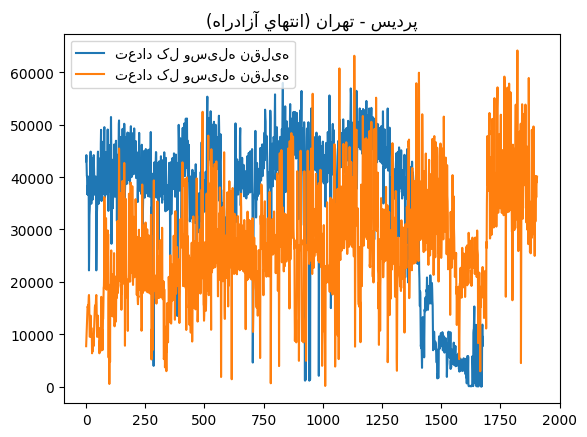

In [24]:
# Now lets plot some of these.
import file_handler
import importlib
importlib.reload(file_handler)


road_min = sorted_models[0]
road_max = sorted_models[-1]
df1=roads[road_min[0]]
df2=roads[road_max[0]]
ax = df1.iloc[:, [6]].plot(title=file_handler.persian_fix(names[road_min[0]]))
df2.iloc[:, [6]].plot(ax = ax, title=file_handler.persian_fix(names[road_max[0]]))



In [ ]:
df

,level_0,index,کد محور,نام محور,زمان شروع,زمان پایان,مدت زمان کارکرد(دقیقه),تعداد کل وسیله نقلیه,تعداد وسیله نقلیه کلاس 1,تعداد وسیله نقلیه کلاس 2,...,تعداد وسیله نقلیه کلاس 5,سرعت متوسط,تعداد تخلف سرعت غیرمجاز,تعداد تخلف فاصله غیرمجاز,تعداد تخلف سبقت غیرمجاز,تعداد برآورد شده,مدت زمان کارکرد (دقیقه),تعداد تخلف سرعت غیر مجاز,تعداد تخلف فاصله غیر مجاز,تعداد تخلف سبقت غیر مجاز
0,0,0,113204,تهران - ساوه (ابتداي آزادراه),1395/01/01 00:00:00,1395/01/02 01:00:00,1475.0,43583,42073,1004,...,95,76.79,210.0,6423.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1,1,113204,تهران - ساوه (ابتداي آزادراه),1395/01/02 01:00:00,1395/01/03 00:00:00,1355.0,40427,38728,1029,...,178,77.93,178.0,6015.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2,2,113204,تهران - ساوه (ابتداي آزادراه),1395/01/03 00:00:00,1395/01/04 00:00:00,1425.0,41353,39394,1179,...,175,74.76,166.0,5848.0,0.0,NaN,NaN,NaN,NaN,NaN
3,3,3,113204,تهران - ساوه (ابتداي آزادراه),1395/01/04 00:00:00,1395/01/05 00:00:00,1430.0,41606,39651,1151,...,180,75.76,98.0,6285.0,0.0,NaN,NaN,NaN,NaN,NaN
4,4,4,113204,تهران - ساوه (ابتداي آزادراه),1395/01/05 00:00:00,1395/01/06 00:00:00,1430.0,43193,40791,1496,...,243,77.03,200.0,6602.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1789,28,113204,آزادراه تهران - ساوه (عوارضي تهران),1401/04/29 00:00:00,1401/04/30 00:00:00,NaN,59648,54095,3037,...,1409,74.00,NaN,NaN,NaN,84918.0,1080.0,23156.0,13585.0,0.0
1790,1790,29,113204,آزادراه تهران - ساوه (عوارضي تهران),1401/04/30 00:00:00,1401/04/31 00:00:00,NaN,75870,69956,3201,...,1414,77.00,NaN,NaN,NaN,88894.0,1285.0,34208.0,17629.0,0.0
1791,1791,30,113204,آزادراه تهران - ساوه (عوارضي تهران),1401/04/31 00:00:00,1401/05/01 00:00:00,NaN,53658,51282,1192,...,497,83.00,NaN,NaN,NaN,65530.0,1190.0,31501.0,7867.0,0.0
1792,1792,0,113204,آزادراه تهران - ساوه (عوارضي تهران),1401/05/01 00:00:00,1401/05/02 00:00:00,NaN,69352,63282,3246,...,1518,78.00,NaN,NaN,NaN,86258.0,1215.0,32528.0,15240.0,0.0


TypeError: getRoadAddress() missing 3 required positional arguments: 'month', 'city', and 'code'

,تعداد کل وسیله نقلیه
0,5257
1,5397
2,4778
3,4525
4,4340
...,...
2020,5975
2021,3232
2022,5300
2023,4543
